In [36]:
import numpy as np # Pour la manipulation de tableaux
from keras.applications import  resnet50
from sklearn import metrics 
import os

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones
from keras.layers import Dense, Conv2D # Pour instancier une couche dense
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2
import keras
from numpy.random import seed
import tensorflow

from keras.preprocessing.image import ImageDataGenerator
import itertools # Pour créer des iterateurs

from sklearn import linear_model, preprocessing 



%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input


In [37]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur_bigger.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.1
epochs=2
batch_size = 600
zoom_range = 1.25
horizontal_flip = True
Minimum_Number_Class=100
dropout_rate=0.1
#steps_per_epoch=len(data_train)//batch_size
steps_per_epoch=1
#validation_steps=len(data_test)//batch_size
validation_steps=1


In [38]:
#df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")
df=pd.read_csv(generateur_path)
df.drop('labels',inplace=True,axis=1)
df.shape
df[df["img_paths"]=='Rec_images_bigger/EK000414_3_pigeon_178.JPG']

,class,img_paths


In [39]:
df["class"].unique()
for c in df:
    print(''+c+':',len(df[c].unique()))
df["class"].unique()

class: 13
img_paths: 6220


array(['oiseau', 'autre', 'corneille', 'pigeon', 'pie', 'chat', 'abeille',
       'chevreuil', 'lapin', 'faisan', 'w', 'sanglier', 'cheval'],
      dtype=object)

In [40]:
All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>Minimum_Number_Class:
        Utilisable.append(i)
Utilisable
Non_Utilisable=set(All_Unique)-set(Utilisable)
Non_Utilisable
for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  
df["class"].unique()

array(['autre', 'corneille', 'pigeon', 'chevreuil', 'lapin', 'faisan'],
      dtype=object)

In [41]:

for i in range(len(df["class"])):
    image_name=df["img_paths"].iloc[i]
    df["img_paths"].iloc[i]=os.path.join(base_img_paths,image_name)
    
df.shape
df[df["img_paths"]=='/home/marcpozzo/Desktop/c3po/Images_aquises/Rec_images_bigger/EK000414_3_pigeon_178.JPG']

,class,img_paths


In [42]:
df["class"].unique()


seed(1)
tensorflow.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)







In [17]:
for e in range(epochs):

    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
        history=model.fit(x_batch, y_batch,verbose=1)
        batches += 1
        if batches >= len(x_train) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

NameError: name 'datagen' is not defined

In [44]:

train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)



"for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32)"

datagen=ImageDataGenerator(
    preprocessing_function = preprocess_input)

train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)
print(5369+597)

Found 5369 validated image filenames belonging to 6 classes.
Found 597 validated image filenames belonging to 6 classes.
5966


Epoch 1/2
8/8 [==============================] - 5s 658ms/step - loss: 6.7368 - accuracy: 0.3198 - val_loss: 1.9881 - val_accuracy: 0.5578
Epoch 2/2
8/8 [==============================] - 5s 631ms/step - loss: 1.8208 - accuracy: 0.5293 - val_loss: 1.5907 - val_accuracy: 0.5678


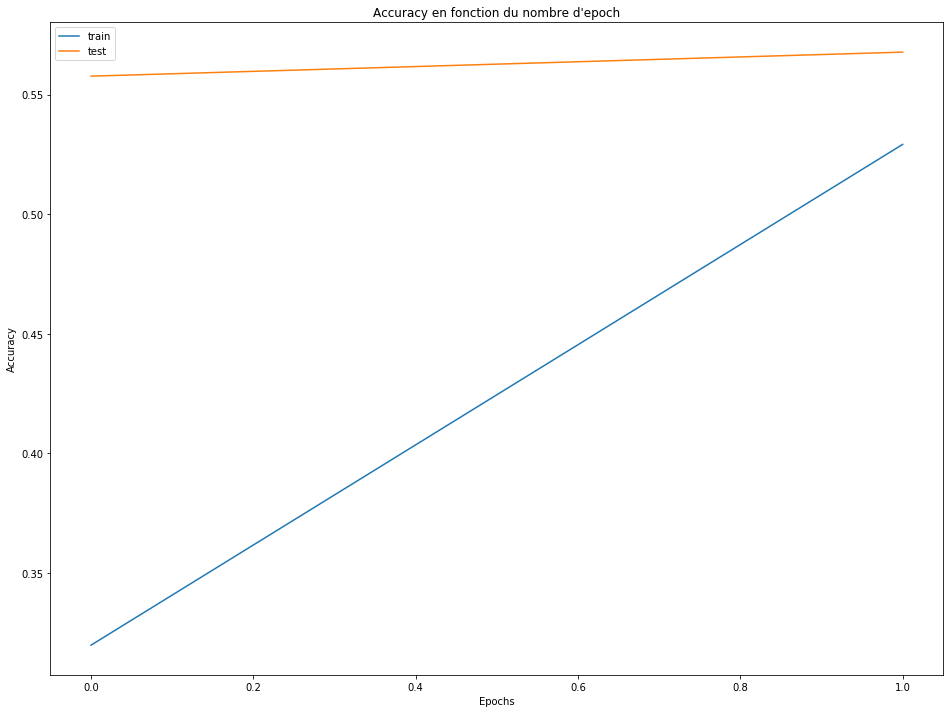

In [45]:
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = dropout_rate)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation




history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
#drop_out.50

Found 4773 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.
800 batch_size
1 zoom_range
100 Minimum_Number_Class
0 dropout_rate
Epoch 1/200
5/5 [==============================] - 3s 610ms/step - loss: 9.1131 - accuracy: 0.3225 - val_loss: 4.7945 - val_accuracy: 0.5038
Epoch 2/200
5/5 [==============================] - 3s 555ms/step - loss: 4.0309 - accuracy: 0.5563 - val_loss: 2.7154 - val_accuracy: 0.4645
Epoch 3/200
5/5 [==============================] - 3s 595ms/step - loss: 2.3403 - accuracy: 0.4286 - val_loss: 1.6426 - val_accuracy: 0.6225
Epoch 4/200
5/5 [==============================] - 3s 580ms/step - loss: 1.4486 - accuracy: 0.6373 - val_loss: 1.4182 - val_accuracy: 0.6320
Epoch 5/200
5/5 [==============================] - 3s 592ms/step - loss: 1.2979 - accuracy: 0.6494 - val_loss: 1.1705 - val_accuracy: 0.6550
Epoch 6/200
5/5 [==============================] - 3s 573ms/step - loss: 1.0807 - accuracy: 0.6836 - val_

<Figure size 1152x864 with 0 Axes>

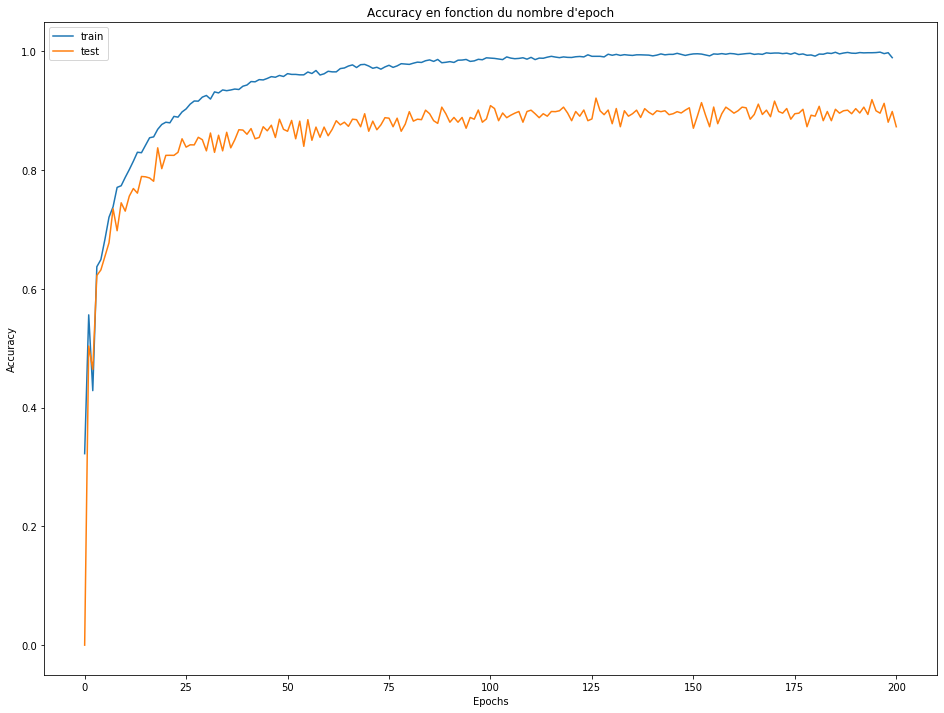

In [252]:
seed(1)
tensorflow.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        #rotation_range = 10,
        #zoom_range = zoom_range,
        #horizontal_flip = horizontal_flip
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)

print(batch_size,"batch_size" )
print(zoom_range,"zoom_range")
print(Minimum_Number_Class,"Minimum_Number_Class")
print(dropout_rate,"dropout_rate" )


lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = dropout_rate)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation


epochs=200

history=lenet.fit_generator( train_generator,
                           
                           
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)


train_acc=[]
test_acc=[]
train_acc=history.history['accuracy']
test_acc=(history.history['val_accuracy'])
test_acc.insert(0,0)    

plt.figure(figsize=(16,12))

modelForPredict = Model(inputs=lenet.input, outputs=lenet.layers[-1].output)



plt.figure(figsize=(16,12))
plt.plot(train_acc,label="train");
plt.plot(test_acc,label="test");
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

In [18]:
modelForPredict = Model(inputs=lenet.input, outputs=lenet.layers[-1].output)

In [59]:
probas = modelForPredict.predict_generator(train_generator)
estimated=probas.argmax(axis=1)
real = train_generator.classes

In [64]:
print(metrics.classification_report(estimated, real))
print(estimated)
print(probas)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      3080
           1       0.01      0.01      0.01       114
           2       0.18      0.17      0.18       996
           3       0.06      0.06      0.06       288
           4       0.03      0.03      0.03       130
           5       0.12      0.12      0.12       761

    accuracy                           0.37      5369
   macro avg       0.16      0.16      0.16      5369
weighted avg       0.38      0.37      0.37      5369

[5 0 0 ... 5 2 2]
[[1.2445042e-09 4.2108335e-28 3.4434608e-10 5.3720993e-07 1.0563923e-13
  9.9999940e-01]
 [9.9972421e-01 5.2115811e-06 2.2337589e-04 9.5451298e-07 3.3624518e-05
  1.2601153e-05]
 [9.9985039e-01 1.2680614e-18 2.1308075e-08 1.4936733e-04 1.8090527e-07
  4.4609386e-10]
 ...
 [6.2319914e-06 8.1361905e-12 1.5073383e-01 1.5477417e-05 2.1611224e-05
  8.4922284e-01]
 [3.9365897e-09 1.6658208e-24 1.0000000e+00 3.5307492e-09 5.7298947e-11
  1.68

In [61]:
comp = pd.DataFrame({"real": real, "estimates" : estimated})

data_crosstab = pd.crosstab(comp['real'], 
                            comp['estimates'],  
                               margins = True) 
print(data_crosstab)


estimates     0    1    2    3    4    5   All
real                                          
0          1721   67  584  180   73  450  3075
1            75    1   21    6    3   16   122
2           567   21  173   42   24  140   967
3           180    7   50   18    7   40   302
4            97    1   28    5    4   24   159
5           440   17  140   37   19   91   744
All        3080  114  996  288  130  761  5369


In [10]:
def convert_image(X):
    X_img=[]
    for image in X:
        # Load image
        img=cv2.imread(image)
        # Resize image
        img=cv2.resize(img,(28,28))
        # for the black and white image
        if img.shape==(28, 28):
            img=img.reshape([28,28,1])
            img=np.concatenate([img,img,img],axis=2)
        # cv2 load the image BGR sequence color (not RGB)
        X_img.append(img[...,::-1])
    return np.array(X_img)

convert_image(data_train["img_paths"]
             )
#data_train.img_paths.iloc[0]

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [43]:
    X=data_train.img_paths.iloc[0]
    X_img=[]
    
    # Load image
    img=cv2.imread(image)
        # Resize image
    """img=cv2.resize(img,(28,28))
        # for the black and white image
        if img.shape==(28, 28):
            img=img.reshape([28,28,1])
            img=np.concatenate([img,img,img],axis=2)
        # cv2 load the image BGR sequence color (not RGB)
        X_img.append(img[...,::-1])"""
    print(data_train.img_paths.iloc[0])
    print(X_img)

/home/marcpozzo/Desktop/c3po/Images_aquises/Rec_images/EK000320_crow_653.JPG
[]


In [83]:
data_train["img_paths"].iloc[0:2]

653    /home/marcpozzo/Desktop/c3po/Images_aquises/Re...
420    /home/marcpozzo/Desktop/c3po/Images_aquises/Re...
Name: img_paths, dtype: object

In [48]:
a=cv2.imread("/home/marcpozzo/Desktop/c3po/Images_aquises/Rec_images_bigger/DSCF0017_ground_41.JPG")
b=cv2.imread("/home/marcpozzo/Desktop/c3po/Images_aquises/Rec_images/DSCF0017_incertain_40.JPG")
plt.imshow(a)

In [95]:
    X=data_train.img_paths.iloc[0:-1]
    X_img=[]
    for image in X:
        img=cv2.imread(image)
        # Load image
        if img!=None:
            # Resize image
            img=cv2.resize(img,(28,28))
            # for the black and white image
            if img.shape==(28, 28):
                img=img.reshape([28,28,1])
                img=np.concatenate([img,img,img],axis=2)
            # cv2 load the image BGR sequence color (not RGB)
            X_img.append(img[...,::-1])
            
        else:
            print("attention photo",image)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [96]:
    X=data_train.img_paths.iloc[0:-1]
    X_img=[]
    for image in X:
        img=cv2.imread(image)
        # Resize image
        img=cv2.resize(img,(28,28))
        # for the black and white image
        if img.shape==(28, 28):
            img=img.reshape([28,28,1])
            img=np.concatenate([img,img,img],axis=2)
        # cv2 load the image BGR sequence color (not RGB)
        X_img.append(img[...,::-1])

In [64]:
'/home/marcpozzo/Desktop/c3po/Images_aquises/Rec_images_bigger/EK000414_3_pigeon_178.JPG'
image

In [75]:
df[df["img_paths"]=='/home/marcpozzo/Desktop/c3po/Images_aquises/Rec_images_bigger/EK000414_3_pigeon_178.JPG']

,class,img_paths
178,pigeon,/home/marcpozzo/Desktop/c3po/Images_aquises/Re...


In [17]:
# Load the images train
X_train_img = convert_image(data_train.img_paths)
Y_train = data_train['class']

# Load the images test
X_test_img = convert_image(data_test.img_paths)
Y_test = data_test['class']

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [66]:
prediction_train=lenet.predict_classes(train_generator)
prediction_test=lenet.predict_classes(test_generator)

ValueError: The `batch_size` argument must not be specified when using a generator or Sequence as an input.

In [1]:


intermediate_layer_model = Model(input=lenet.input, output=lenet.layers[-2].output)

X_train_features = intermediate_layer_model.predict(preprocess_input(X_train_img))

X_test_features = intermediate_layer_model.predict(preprocess_input(X_test_img))


y_train=data_train["class"]
y_test=data_test["class"]

lg = linear_model.LogisticRegression(C = 1.0)
lg.fit(X_train_features, y_train);
y_predict=lg.predict(X_test_features)
print(lg.score(X_test_features, y_test))
print(metrics.classification_report(y_test, y_predict))

NameError: name 'Model' is not defined

In [271]:
X_test_features1 = intermediate_layer_model.predict(preprocess_input(X_test_img))


In [64]:
from keras.models import load_model

lenet.save("model.h8")
model = load_model('model.h8')
intermediate_layer_model = Model(input=model.input, output=model.layers[-2].output)
X_test_features = intermediate_layer_model.predict(preprocess_input(X_test_img))
y_predict=lg.predict(X_test_features)
print(lg.score(X_test_features, y_test))
print(metrics.classification_report(y_test, y_predict))

0.9212730318257957
              precision    recall  f1-score   support

       autre       0.94      0.97      0.96       684
   chevreuil       0.96      0.85      0.90        27
   corneille       0.88      0.93      0.90       215
      faisan       0.87      0.81      0.84        67
       lapin       0.75      0.60      0.67        35
      pigeon       0.92      0.83      0.87       166

    accuracy                           0.92      1194
   macro avg       0.89      0.83      0.86      1194
weighted avg       0.92      0.92      0.92      1194



/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [258]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C = 1.0)
lg.fit(X_train_features, y_train);
y_predict=lg.predict(X_test_features)
print(lg.score(X_test_features, y_test))
print(metrics.classification_report(y_test, y_predict))


/home/marcpozzo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcpozzo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9212730318257957
              precision    recall  f1-score   support

       autre       0.94      0.97      0.96       684
   chevreuil       0.96      0.85      0.90        27
   corneille       0.88      0.93      0.90       215
      faisan       0.87      0.81      0.84        67
       lapin       0.75      0.60      0.67        35
      pigeon       0.92      0.83      0.87       166

    accuracy                           0.92      1194
   macro avg       0.89      0.83      0.86      1194
weighted avg       0.92      0.92      0.92      1194



In [251]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lg, open(filename, 'wb'))
 
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_features, y_test)
y_predict=loaded_model.predict(X_test_features)
print(lg.score(X_test_features, y_test))
print(metrics.classification_report(y_test, y_predict))


0.9212730318257957
              precision    recall  f1-score   support

       autre       0.94      0.97      0.96       684
   chevreuil       0.96      0.85      0.90        27
   corneille       0.88      0.93      0.90       215
      faisan       0.87      0.81      0.84        67
       lapin       0.75      0.60      0.67        35
      pigeon       0.92      0.83      0.87       166

    accuracy                           0.92      1194
   macro avg       0.89      0.83      0.86      1194
weighted avg       0.92      0.92      0.92      1194



In [264]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion = "entropy",max_depth = 30,random_state = 123)
dt_clf.fit(X_train_features, y_train);
y_predict=dt_clf.predict(X_test_features)
print(dt_clf.score(X_test_features, y_test))
print(metrics.classification_report(y_test, y_predict))

0.8492462311557789
              precision    recall  f1-score   support

       autre       0.92      0.92      0.92       684
   chevreuil       0.62      0.74      0.68        27
   corneille       0.78      0.88      0.83       215
      faisan       0.77      0.73      0.75        67
       lapin       0.45      0.43      0.44        35
      pigeon       0.80      0.67      0.73       166

    accuracy                           0.85      1194
   macro avg       0.72      0.73      0.72      1194
weighted avg       0.85      0.85      0.85      1194



In [257]:
filename = 'dt_clf_model.sav'
pickle.dump(dt_clf, open(filename, 'wb'))

Found 4773 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.
Epoch 1/200
11/11 [==============================] - 3s 309ms/step - loss: 5.2914 - accuracy: 0.5043 - val_loss: 2.3394 - val_accuracy: 0.5387
Epoch 2/200
11/11 [==============================] - 3s 268ms/step - loss: 1.7055 - accuracy: 0.5760 - val_loss: 1.4554 - val_accuracy: 0.6423
Epoch 3/200
11/11 [==============================] - 3s 274ms/step - loss: 1.1568 - accuracy: 0.6636 - val_loss: 1.1287 - val_accuracy: 0.6587
Epoch 4/200
11/11 [==============================] - 3s 272ms/step - loss: 0.9492 - accuracy: 0.7020 - val_loss: 1.0032 - val_accuracy: 0.6875
Epoch 5/200
11/11 [==============================] - 3s 277ms/step - loss: 0.7836 - accuracy: 0.7576 - val_loss: 0.9696 - val_accuracy: 0.7406
Epoch 6/200
11/11 [==============================] - 3s 286ms/step - loss: 0.6852 - accuracy: 0.7882 - val_loss: 0.7757 - val_accuracy: 0.7620
Epoch 7/200
11/11 [=

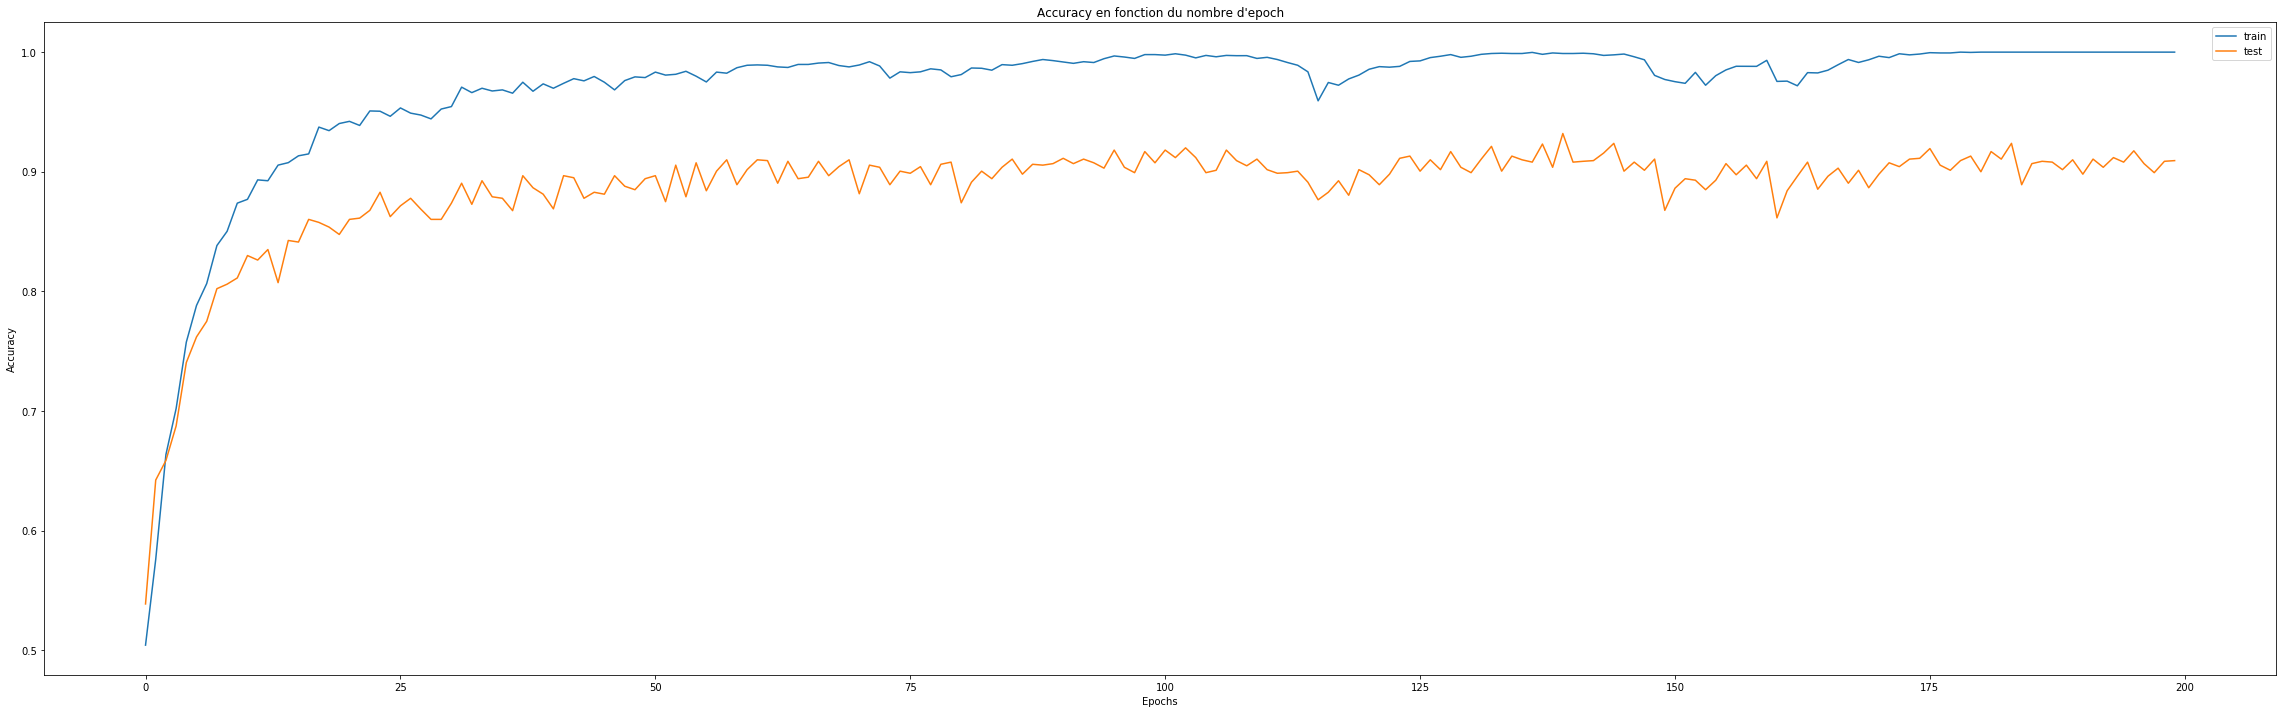

In [265]:
#Epoch_Size_list=[10,50,100,200,400,600,800,1000]
Epoch_Size_list=[800]
Ep_len=len( Epoch_Size_list)
j=1
dropout_rate=0.1
for batch_size in Epoch_Size_list:
    
    train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)
    test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


    
    
    lenet = Sequential()

    conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

    max_pool_1 = MaxPooling2D(pool_size = (2, 2))

    conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

    max_pool_2 = MaxPooling2D(pool_size = (2, 2))

    flatten = Flatten()

    dropout = Dropout(rate = dropout_rate)

    dense_1 = Dense(units = 128,
                activation = 'relu')

    dense_2 = Dense(units = 6,
                activation = 'softmax')

    lenet.add(conv_1)
    lenet.add(max_pool_1)
    lenet.add(conv_2)
    lenet.add(max_pool_2)
    lenet.add(dropout)
    lenet.add(flatten)
    lenet.add(dense_1)
    lenet.add(dense_2)



    
    
    
    lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation
    
    history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          


    plt.figure(figsize=(40,12))
    plt.subplot(Ep_len,1,j)
    
    plt.plot(history.history['accuracy'],label="train");
    plt.plot(history.history['val_accuracy'],label="test");
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy en fonction du nombre d'epoch");
    plt.legend();
    
    
    
    j=j+1

In [203]:
#Epoch_Size_list=[10,50,100,200,400,600,800,1000]
Epoch_Size_list=800

Ep_len=len( Epoch_Size_list)
j=1
for batch_size in Epoch_Size_list:
    
    train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)
    test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


    
    
    lenet = Sequential()

    conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

    max_pool_1 = MaxPooling2D(pool_size = (2, 2))

    conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

    max_pool_2 = MaxPooling2D(pool_size = (2, 2))

    flatten = Flatten()

    dropout = Dropout(rate = dropout_rate)

    dense_1 = Dense(units = 128,
                activation = 'relu')

    dense_2 = Dense(units = 6,
                activation = 'softmax')

    lenet.add(conv_1)
    lenet.add(max_pool_1)
    lenet.add(conv_2)
    lenet.add(max_pool_2)
    lenet.add(dropout)
    lenet.add(flatten)
    lenet.add(dense_1)
    lenet.add(dense_2)



    
    
    
    lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation
    
    history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          


    plt.figure(figsize=(40,12))
    plt.subplot(Ep_len,1,j)
    
    plt.plot(history.history['accuracy'],label="train");
    plt.plot(history.history['val_accuracy'],label="test");
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy en fonction du nombre d'epoch");
    plt.legend();
    
    
    
    j=j+1

Found 4773 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.
Epoch 1/10
5/5 [==============================] - 4s 866ms/step - loss: 0.0429 - accuracy: 0.9890 - val_loss: 1.9842 - val_accuracy: 0.8425
Epoch 2/10
5/5 [==============================] - 4s 790ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 2.2584 - val_accuracy: 0.8198
Epoch 3/10
5/5 [==============================] - 4s 839ms/step - loss: 0.0419 - accuracy: 0.9897 - val_loss: 2.4375 - val_accuracy: 0.8238
Epoch 4/10
5/5 [==============================] - 4s 759ms/step - loss: 0.0611 - accuracy: 0.9854 - val_loss: 1.7307 - val_accuracy: 0.8350
Epoch 5/10
5/5 [==============================] - 4s 844ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 2.3834 - val_accuracy: 0.8313
Epoch 6/10
5/5 [==============================] - 4s 810ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 1.8577 - val_accuracy: 0.8249
Epoch 7/10
5/5 [======================

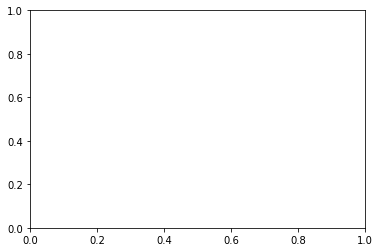

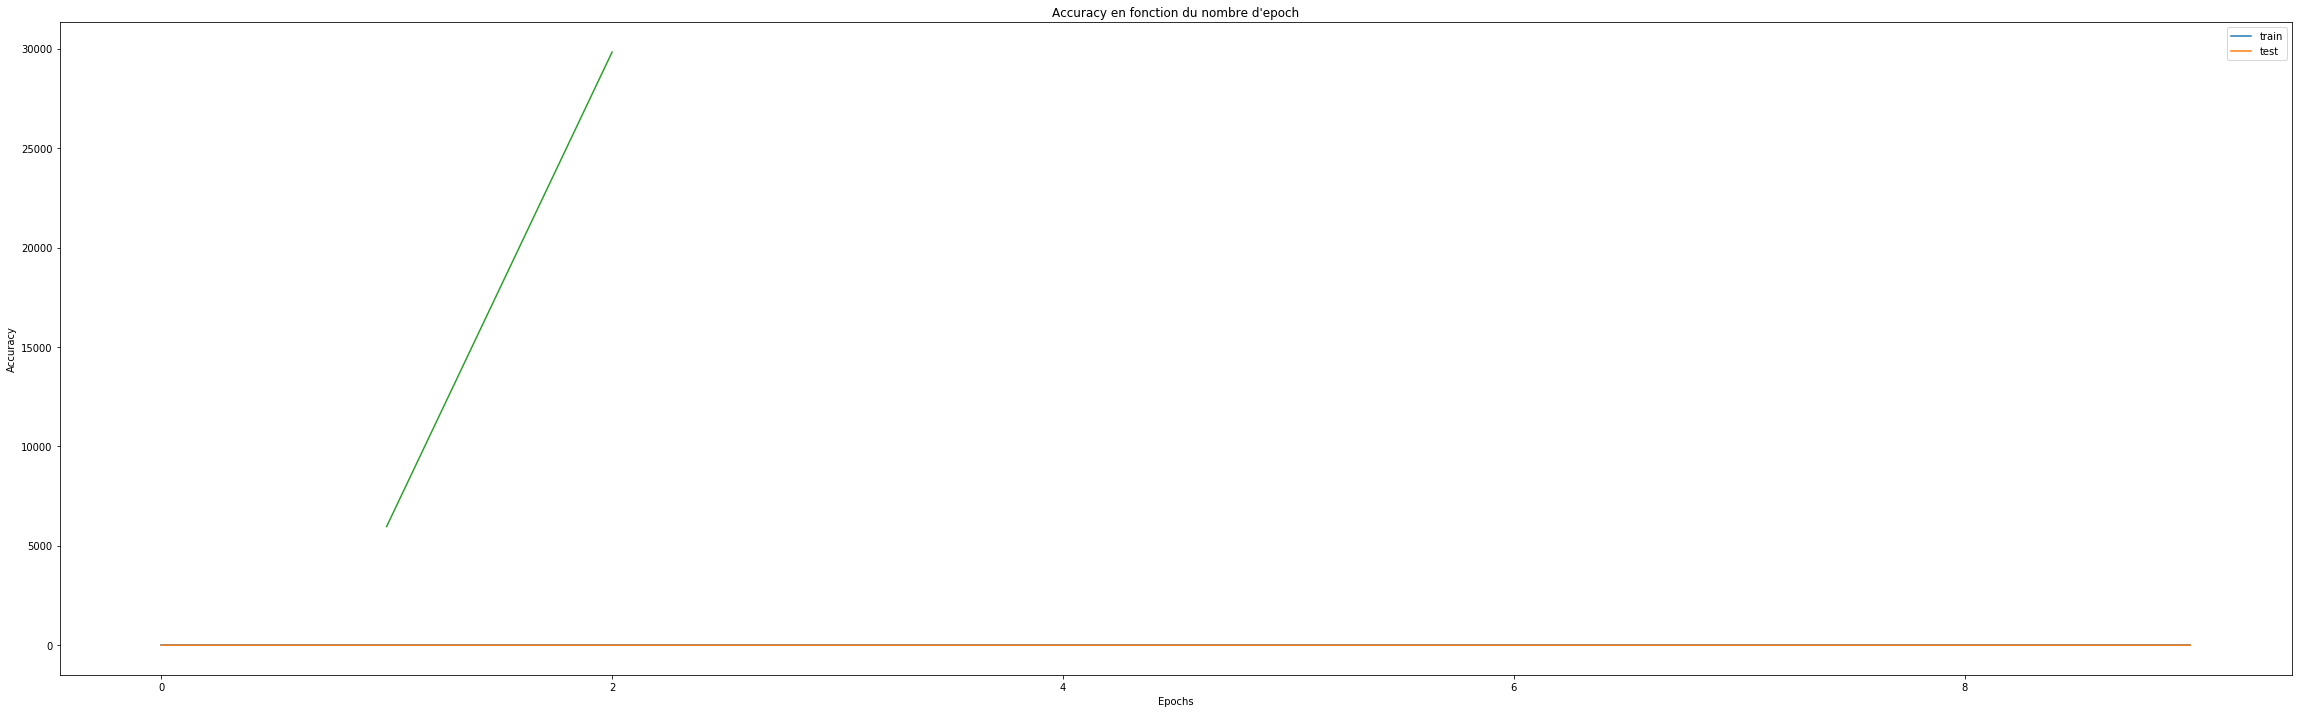

In [204]:
Epoch_Size_list=[800]
Ep_len=len( Epoch_Size_list)
j=1
for batch_size in Epoch_Size_list:
    
    train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)
    test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


    
    plt.subplot(Ep_len,1,j)
    
    history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          


    plt.figure(figsize=(40,12))

    plt.plot(history.history['accuracy'],label="train");
    plt.plot(history.history['val_accuracy'],label="test");
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title("Accuracy en fonction du nombre d'epoch");
    plt.legend();
    
    
    
    plt.plot([1,2],[i,5*i])
    j=j+1

In [32]:
df["img_paths"].iloc[0]

'/home/marcpozzo/Desktop/c3po/Images_aquises/Rec_images_bigger/DSCF0029_ground_1.JPG'